In [3]:
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pandas.plotting import autocorrelation_plot

In [15]:
data = pd.read_csv('data/All_India_Index_August2016.csv')

In [5]:
data.head(5)

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index,Unnamed: 30,Unnamed: 31
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1,,
1,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0,NaN,NaN
2,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,102.2,...,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6,NaN,NaN
3,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,102.4,...,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8,NaN,NaN
4,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7,NaN,NaN


In [6]:
data['Month'] = data.Month.str.strip()

In [7]:
data['TimeStamp'] = pd.to_datetime(['{}-{}-1'.format(y,m) for y,m in zip(data.Year,data.Month)],format='%Y-%B-%d')

In [8]:
data = data.drop(['Year','Month'],axis=1)

In [9]:
data_rural = data[data['Sector'] == 'Rural']

In [10]:
data_urban = data[data['Sector'] == 'Urban']

In [11]:
def autocorrelation(series):
    autocorrelation_plot(series)
    pyplot.show()

In [12]:
def predict_plot(commodity,sector):
    if(sector == 'urban'):
        data = data_urban
    elif(sector == 'rural'):
        data = data_rural
    X = data[commodity].values
    size = int(len(X) * 0.66)
    train,test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history,order=(8,1,0))
        model_fit = model.fit(disp=0)
        print(model_fit.summary())
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('prediction=%f,expected=%f' %(yhat,obs))
    error = mean_squared_error(test,predictions)
    print('Test MSE: %.3f' %error)
    pyplot.plot(test)
    pyplot.plot(predictions,color='red')
    pyplot.show()

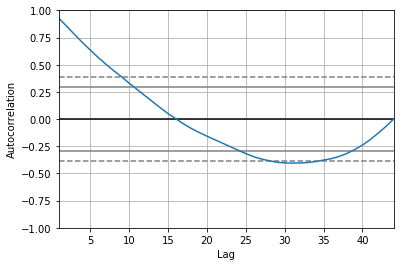

In [14]:
autocorrelation(data_rural['Education'].values)

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   28
Model:                ARIMA(10, 1, 0)   Log Likelihood                  -0.454
Method:                       css-mle   S.D. of innovations              0.230
Date:                Thu, 04 Apr 2019   AIC                             24.908
Time:                        12:18:17   BIC                             40.894
Sample:                             1   HQIC                            29.795
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6002      0.023     26.623      0.000       0.556       0.644
ar.L1.D.y      0.2841      0.182      1.557      0.138      -0.074       0.642
ar.L2.D.y     -0.1790      0.190     -0.944      0.3

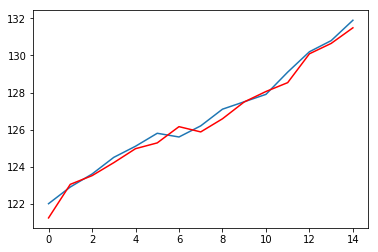

In [13]:
predict_plot('Education','rural')

d:\gbl-hackathon\genv\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


prediction=120.295300,expected=120.400000


d:\gbl-hackathon\genv\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


prediction=120.585235,expected=120.800000
prediction=121.271372,expected=121.100000
prediction=121.801970,expected=121.400000
prediction=121.923157,expected=122.000000
prediction=122.361416,expected=122.600000
prediction=123.188749,expected=123.100000
prediction=123.662405,expected=123.700000
prediction=124.387331,expected=124.300000
prediction=124.848604,expected=124.800000
prediction=125.291244,expected=125.200000
prediction=125.752980,expected=125.800000
prediction=126.391447,expected=126.200000
prediction=126.682150,expected=126.700000
prediction=127.242926,expected=127.000000
Test MSE: 0.029


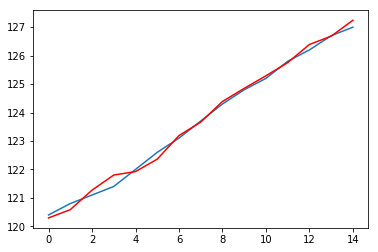

In [27]:
predict_plot('Health','rural')

prediction=114.108336,expected=114.200000
prediction=114.940961,expected=114.100000
prediction=114.058830,expected=113.600000
prediction=113.405974,expected=113.800000
prediction=114.211163,expected=113.800000
prediction=114.035511,expected=114.000000
prediction=114.296340,expected=114.000000
prediction=114.262273,expected=113.600000
prediction=113.536569,expected=113.900000
prediction=114.289129,expected=113.600000
prediction=113.688207,expected=114.400000
prediction=114.890106,expected=115.100000
prediction=115.696518,expected=116.300000
prediction=116.923040,expected=116.400000
prediction=116.608512,expected=116.000000
Test MSE: 0.263


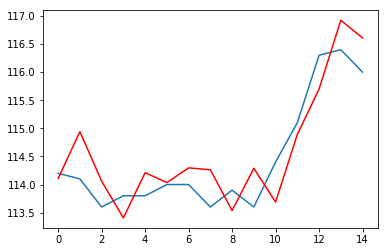

In [30]:
predict_plot('Transport and communication','rural')

In [39]:
def getsemantics(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)